<a href="https://colab.research.google.com/github/ashleighr01/MLA_AMR/blob/main/MLA5_AMR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning Assignment 5**
*Ashleigh Rufus*

#*Import Specific Models*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [6]:
from sklearn import set_config
set_config(display='diagram')

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

#*Acquire Data--Problem 1 & 2*

In [8]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/landsat_test.csv')

In [9]:
landsat_train.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [10]:
landsat_test.head()

,top_left_r,top_left_g,top_left_infra1,top_left_infra2,top_middle_r,top_middle_g,top_middle_infra1,top_middle_infra2,top_right_r,top_right_g,...,bottom_left_infra2,bottom_middle_r,bottom_middle_g,bottom_middle_infra1,bottom_middle_infra2,bottom_right_r,bottom_right_g,bottom_right_infra1,bottom_right_infra2,land_type
0,80,102,102,79,76,102,102,79,76,102,...,87,79,107,109,87,79,107,113,87,3
1,76,102,102,79,76,102,106,83,76,102,...,87,79,107,113,87,79,103,104,83,3
2,80,98,106,79,76,94,102,76,76,94,...,79,79,95,100,79,79,95,96,75,4
3,76,94,102,76,76,94,102,76,76,94,...,79,79,95,96,75,79,95,100,75,4
4,76,94,102,76,76,94,102,76,76,89,...,75,79,95,100,75,75,95,100,79,4


#*Statistical & Visual Exploration*

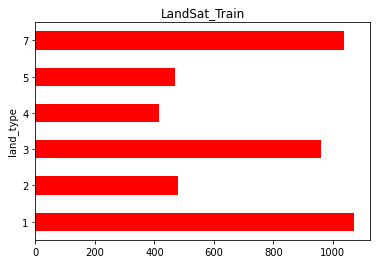

In [11]:
landsat_train.land_type.groupby(landsat_train.land_type).count().plot(kind='barh', title='LandSat_Train', color='red')

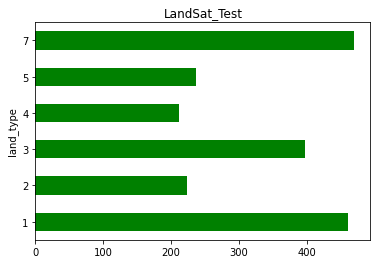

In [12]:
landsat_test.land_type.groupby(landsat_test.land_type).count().plot(kind='barh', title='LandSat_Test', color='green')

#*Splitting Data into Train/Test*

In [13]:
X_train = landsat_train.iloc[:, 0:-1]
X_test = landsat_test.iloc[:, 0:-1]

In [14]:
y_train = landsat_train[['land_type']]
y_test = landsat_test[['land_type']]

#*Building the Pipeline*

In [15]:
landsat_test.columns

Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2', 'land_type'],
      dtype='object')

In [16]:
num_attribs = ['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g',
       'middle_left_infra1', 'middle_left_infra2', 'central_pixel_r',
       'central_pixel_g', 'central_pixel_infra1', 'central_pixel_infra2',
       'middle_right_r', 'middle_right_g', 'middle_right_infra1',
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2']

In [17]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), num_attribs)],
    remainder='passthrough'
)

In [18]:
random_forest = Pipeline ([
    ('transform',col_transform),
    ('rf', RandomForestClassifier(n_estimators=1000, 
                                  max_samples=500, 
                                  bootstrap=True, 
                                  oob_score=True, 
                                  n_jobs=-1))
])

#*Executing the Model*

In [19]:
random_forest.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

#*Evaluating the Model*

In [20]:
y_pred = random_forest.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.98      0.96      0.97       224
           3       0.87      0.95      0.91       397
           4       0.73      0.58      0.65       211
           5       0.91      0.76      0.83       237
           7       0.84      0.87      0.86       470

    accuracy                           0.88      2000
   macro avg       0.88      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



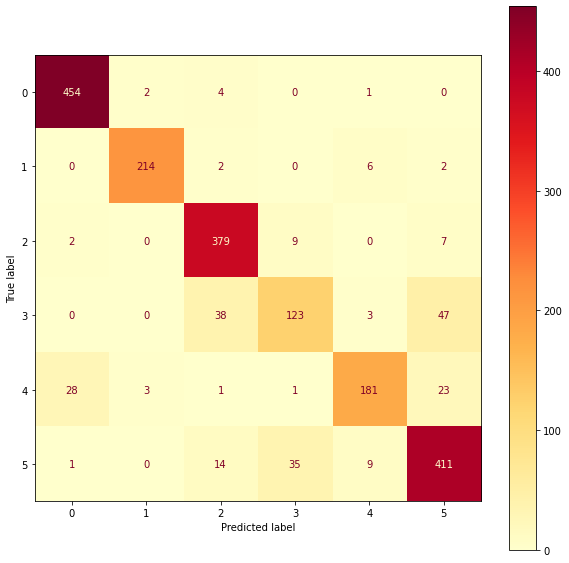

In [22]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

#*Problem 1--Conclusion*

This model does appear to be pretty suitable to predict the land types. Specifically, the first and last types appear to accurately be predicted the most. There are a few incorrect predictions through each type but a small amount

#***Problem 2***

#*Building the Pipeline (Bagging Classifier)*

In [23]:
bagging = Pipeline([
    ('transform', col_transform),
    ('bagging', BaggingClassifier(DecisionTreeClassifier (),
                                  n_estimators=1000,
                                  max_samples=500,
                                  bootstrap=True,
                                  n_jobs=-1))
])

#*Executing the Model--Bagging Classifier*

In [24]:
bagging.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left...
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('bagging',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   max_samples=500, n_estimators=1000,
                                   n_jobs=-1))])

#*Evaluating the Model--Bagging Classifier*

In [25]:
y_pred_bag = bagging.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           1       0.94      0.98      0.96       461
           2       0.99      0.95      0.97       224
           3       0.86      0.95      0.90       397
           4       0.70      0.60      0.64       211
           5       0.89      0.77      0.83       237
           7       0.84      0.86      0.85       470

    accuracy                           0.88      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.88      0.88      0.87      2000



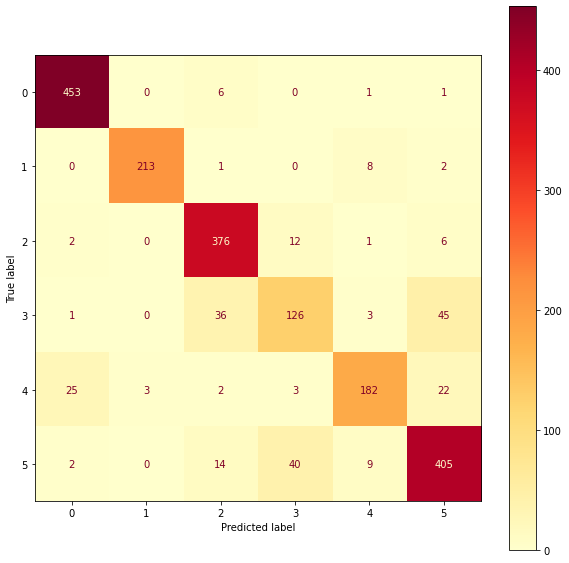

In [27]:
cm = confusion_matrix(y_test, y_pred_bag)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

#*Problem 2--Conclusion*

The bagging algorithm also has a suitable model for predicting the land type. It appears that the overall accuracy stayed the same in comparison to the random forest classifier. The predictions for land types 1-4 did change slightly as well with this classifier.

#***Problem 3***

#*Acquire Data*

In [28]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

In [29]:
df.head()

,variance,skewness,curtosis,entropy,forgery
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


#*Splitting Data into Test/Train*

In [30]:
X = df.iloc[:,0:-1]
y = df[['forgery']]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=24)

#*Building the Pipeline*

In [33]:
banknum_attribs = ['variance', 'skewness', 'curtosis', 'entropy']

In [34]:
col_transform = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), banknum_attribs)],
    remainder='passthrough'
)

In [35]:
random_forest2 = Pipeline([
    ('trans', col_transform),
    ('rf', RandomForestClassifier(n_estimators=1000,
                                  max_samples=500,
                                  bootstrap = True,
                                  oob_score= True,
                                  n_jobs=-1))
])

#*Executing the Model*

In [36]:
random_forest2.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('rf',
                 RandomForestClassifier(max_samples=500, n_estimators=1000,
                                        n_jobs=-1, oob_score=True))])

#*Evaluating the Model*

In [37]:
y_pred_bank = random_forest2.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred_bank))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.98      0.99      0.99       126

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



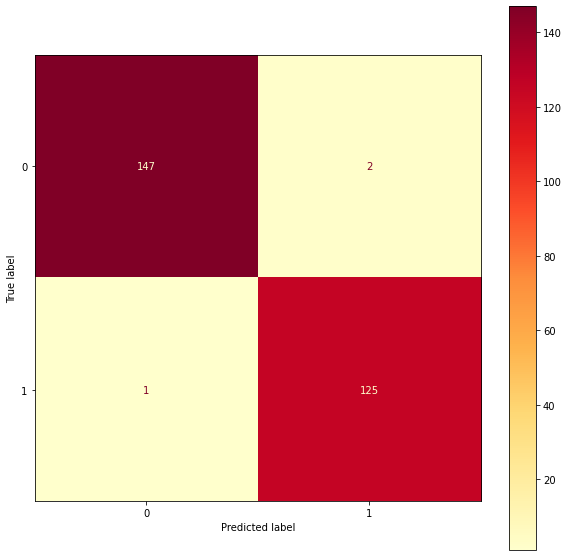

In [39]:
cm = confusion_matrix(y_test, y_pred_bank)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap='YlOrRd')

#*Problem 3--Conclusion*

The random forest classifier did a really good job with predicting whether it was a forgery or not. The accuracy came out to 99% and the confusion matrix had only three incorrect predicted labels. On previous models, there a little over ten incorrect predictions so there was improvement with this model.